===========================================
ANÁLISE EXPLORATÓRIA DATASET TITANIC
===========================================

O objetivo desta análise é explorar o dataset Titanic.csv para compreender as características populacionais dos passageiros e investigar os fatores associados à sobrevivência.

A análise será conduzida em etapas que incluem:

- Limpeza e organização dos dados (remoção, reordenação e renomeação de colunas).
- Tratamento de valores nulos de forma consistente e metodologicamente adequada.
- Verificação da premissa de que o valor do ticket reflete a classe social representada pela classe do navio.
- Descrição das características populacionais dos passageiros por classe (idade e sexo).
- Descrição das características dos sobreviventes por classe (idade e sexo).
- Relação das chances de sobrevivência com classe, idade e sexo.


In [122]:
#iniciando a biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import numpy as np
from tabulate import tabulate

In [39]:
#lendo o arquivo csv e armazenando em um dataframe
df = pd.read_csv('../Src/titanic_dataset.csv')

In [40]:
#exibindo as primeiras linhas do dataframe
print("VISÃO GERAL DO DATASET")
print ("\n")
print("10 Primeiros registros")
print(tabulate(df.head(10), headers=df.columns, tablefmt="grid"))
print("---------------------------------------------------------")
print("\n")

VISÃO GERAL DO DATASET


10 Primeiros registros
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+=========+============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
| 

Apresentando outras informações do dataset

In [41]:
#Exibindo informações sobre a estrutura do dataset
print("Estrutura")
# cria DataFrame com informações detalhadas
info_df = pd.DataFrame({
    "Column": df.columns,
    "Dtype": df.dtypes.values,
    "Non-Null Count": df.notnull().sum().values,
    "Null Count": df.isnull().sum().values,
})

# exibe em formato tabular
print(tabulate(info_df, headers="keys", tablefmt="grid"))



#Exibindo a quantidade de linhas e colunas do dataframe
linhas = (df.shape[0])
print(f"Total de registros: {linhas}")

#Verificando a quantidade de linhas repetidas no dataframe
linhas_repetidas = df.duplicated().sum()
print(f"Registros duplicados: {linhas_repetidas}")
print("---------------------------------------------------------")
print("\n")

Estrutura
+----+-------------+---------+------------------+--------------+
|    | Column      | Dtype   |   Non-Null Count |   Null Count |
+====+=============+=========+==================+==============+
|  0 | PassengerId | int64   |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  1 | Survived    | int64   |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  2 | Pclass      | int64   |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  3 | Name        | str     |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  4 | Sex         | str     |              891 |            0 |
+----+-------------+---------+------------------+--------------+
|  5 | Age         | float64 |              714 |          177 |
+----+-------------+---------+------------------+--------------+
|  6 | SibSp   

In [42]:
print("Exclusão de atributos irrelevantes")

print("O atributo Cabine foi excluído devido ao grande número de dados nulos.")
#excluir a coluna 'Cabin' do dataframe
df = df.drop(columns=['Cabin'])

#excluir as colunas 'Sibsp', 'Parch','Ticket','Embarked' do dataframe
print("Os atributos SibSp, Parch, Ticket e Embarked foram excluídos por terem sido considerados irrelevantes para esta análise.")
df = df.drop(columns=['SibSp', 'Parch','Ticket','Embarked'])

print("OS valores de ID_Passageito e Nome foram mantidos para fins de identificação dos passageiros, mas não serão utilizados nas análises subsequentes.")

Exclusão de atributos irrelevantes
O atributo Cabine foi excluído devido ao grande número de dados nulos.
Os atributos SibSp, Parch, Ticket e Embarked foram excluídos por terem sido considerados irrelevantes para esta análise.
OS valores de ID_Passageito e Nome foram mantidos para fins de identificação dos passageiros, mas não serão utilizados nas análises subsequentes.


In [43]:
#alterado a ordem das colunas
df = df[['PassengerId','Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Survived']]

#renomeando as colunas do dataframe
df.columns = ['ID_Passageiro',
              'Nome',
              'Genero',
              'Idade',
              'Classe',
              'Vlr_Tarifa',
              'Sobrevivente']

# Informando o novo valor das colunas do dataset Titanic para português
# Colunas originais do dataset Titanic
colunas_originais = [
    'PassengerId','Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Survived']

# Novo Valor
colunas_novas = [
    'ID_Passageiro','Nome','Genero','Idade','Classe','Vlr_Tarifa','Sobrevivente']

# Criar DataFrame comparativo
df_colunas = pd.DataFrame({
    "Original": colunas_originais,
    "Novo Valor": colunas_novas
})
print("A ordem e descrição dos atributos e foram alterados de acordo com o seguinte:")
print(tabulate(df_colunas, headers=df_colunas.columns, tablefmt="grid"))

A ordem e descrição dos atributos e foram alterados de acordo com o seguinte:
+----+-------------+---------------+
|    | Original    | Novo Valor    |
+====+=============+===============+
|  0 | PassengerId | ID_Passageiro |
+----+-------------+---------------+
|  1 | Name        | Nome          |
+----+-------------+---------------+
|  2 | Sex         | Genero        |
+----+-------------+---------------+
|  3 | Age         | Idade         |
+----+-------------+---------------+
|  4 | Pclass      | Classe        |
+----+-------------+---------------+
|  5 | Fare        | Vlr_Tarifa    |
+----+-------------+---------------+
|  6 | Survived    | Sobrevivente  |
+----+-------------+---------------+


In [44]:
#substituindo os valores da coluna 'Sobrevivente' para 'Sobrevivente" e 'Não Sobrevivente'
df['Sobrevivente'] = df['Sobrevivente'].replace({0: 'Não Sobrevivente', 1: 'Sobrevivente'})
print("Os valores da coluna 'Sobrevivente' - '0' e '1' - foram substituídos por 'Não Sobrevivente' e 'Sobrevivente' respectivamente.")

#substituindo os valores da coluna 'Genero' para 'Masculino' e 'Feminino'
df['Genero'] = df['Genero'].replace({'male': 'Masculino', 'female': 'Feminino'})
print("Os valores da coluna Genero - 'male' e 'female' - foram substituidos por 'Masculino' e 'Feminino' respectivamente.")



Os valores da coluna 'Sobrevivente' - '0' e '1' - foram substituídos por 'Não Sobrevivente' e 'Sobrevivente' respectivamente.
Os valores da coluna Genero - 'male' e 'female' - foram substituidos por 'Masculino' e 'Feminino' respectivamente.


In [45]:
print("Dataset resultado após as alterações:")
#exibindo as primeiras linhas do dataframe
print(tabulate(df.head(10), headers=df.columns, tablefmt="grid"))

Dataset resultado após as alterações:
+----+-----------------+-----------------------------------------------------+-----------+---------+----------+--------------+------------------+
|    |   ID_Passageiro | Nome                                                | Genero    |   Idade |   Classe |   Vlr_Tarifa | Sobrevivente     |
+====+=================+=====================================================+===========+=========+==========+==============+==================+
|  0 |               1 | Braund, Mr. Owen Harris                             | Masculino |      22 |        3 |       7.25   | Não Sobrevivente |
+----+-----------------+-----------------------------------------------------+-----------+---------+----------+--------------+------------------+
|  1 |               2 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | Feminino  |      38 |        1 |      71.2833 | Sobrevivente     |
+----+-----------------+-----------------------------------------------------+--------

In [48]:
#Verficando a quantidade de dados nulos na coluna 'Idade' por classe
query = """
SELECT
    Classe,
    COUNT(*) AS total_por_classe,
    SUM(CASE WHEN Idade IS NULL THEN 1 ELSE 0 END) AS nulos_idade,
    ROUND(
        SUM(CASE WHEN Idade IS NULL THEN 1 ELSE 0 END) * 1.0 / COUNT(*), 2
    ) AS proporcao_nulos
FROM df
GROUP BY Classe
ORDER BY Classe;
"""

# Executar a consulta
resultado_classe = ps.sqldf(query, locals())
print("Taxa de dados nulos na coluna 'Idade' por classe:")
print(tabulate(resultado_classe, headers=resultado_classe.columns, tablefmt="grid"))
print("Observação: A classe 3 apresenta a maior taxa dados nulos na coluna 'Idade', sendo 2x maior que a taxa da classe 1 e 4,6x maior que da classe 2." \
"\nIsso pode indicar tratamento diferenciado na execução dos registros dos passageiros de acordo com a classe.")

Taxa de dados nulos na coluna 'Idade' por classe:
+----+----------+--------------------+---------------+-------------------+
|    |   Classe |   total_por_classe |   nulos_idade |   proporcao_nulos |
+====+==========+====================+===============+===================+
|  0 |        1 |                216 |            30 |              0.14 |
+----+----------+--------------------+---------------+-------------------+
|  1 |        2 |                184 |            11 |              0.06 |
+----+----------+--------------------+---------------+-------------------+
|  2 |        3 |                491 |           136 |              0.28 |
+----+----------+--------------------+---------------+-------------------+
Observação: A classe 3 apresenta a maior taxa dados nulos na coluna 'Idade', sendo 2x maior que a taxa da classe 1 e 4,6x maior que da classe 2.
Isso pode indicar tratamento diferenciado na execução dos registros dos passageiros de acordo com a classe.


In [ ]:
#Verificando a quantidade de dados nulos na coluna 'Idade' por gênero
query = """
SELECT
    Genero,
    COUNT(*) AS total_por_genero,
    SUM(CASE WHEN Idade IS NULL THEN 1 ELSE 0 END) AS nulos_idade,
    ROUND(
        SUM(CASE WHEN Idade IS NULL THEN 1 ELSE 0 END) * 1.0 / COUNT(*), 2
    ) AS proporcao_nulos
FROM df
GROUP BY Genero
ORDER BY Genero;
"""
# Executar a consulta
resultado_genero = ps.sqldf(query, locals())
print("Taxa de dados nulos na coluna 'Idade' por gênero:")
print(tabulate(resultado_genero, headers=resultado_genero.columns, tablefmt="grid"))
print('Observação: a diferença na taxa de dados nulos na coluna "Idade" entre os gêneros não é significativa sendo 0,21 para o gênero masculino e 0,17 para o gênero feminino.' \
' \nOs valores nulos para Idade serão tratados de acordo com a mediana de idade da classe do passageiro.')

Taxa de dados nulos na coluna 'Idade' por gênero:
+----+-----------+--------------------+---------------+-------------------+
|    | Genero    |   total_por_genero |   nulos_idade |   proporcao_nulos |
+====+===========+====================+===============+===================+
|  0 | Feminino  |                314 |            53 |              0.17 |
+----+-----------+--------------------+---------------+-------------------+
|  1 | Masculino |                577 |           124 |              0.21 |
+----+-----------+--------------------+---------------+-------------------+
Observação: a diferença na taxa de dados nulos na coluna "Idade" entre os gêneros não é significativa sendo 0,21 para o gênero masculino e 0,17 para o gênero feminino. 
Os valores nulos para Idade serão tratados de acordo com a classe do passageiro.


In [ ]:
# Calculando a mediana da idade por classe
mediana_idade_classe = df.groupby('Classe')['Idade'].median()

# Transformando em DataFrame e renomeando a coluna
tabela_mediana = mediana_idade_classe.to_frame().reset_index()
tabela_mediana.columns = ["Classe", "Mediana"]

# Imprimindo a tabela formatada
print("Mediana da idade dos passageiros por classe:")
print(tabulate(tabela_mediana, headers=tabela_mediana.columns, tablefmt="grid"))

Mediana da idade por classe:
+----+----------+-----------+
|    |   Classe |   Mediana |
+====+==========+===========+
|  0 |        1 |        37 |
+----+----------+-----------+
|  1 |        2 |        29 |
+----+----------+-----------+
|  2 |        3 |        24 |
+----+----------+-----------+


In [57]:
#Substituindo os valores nulos da coluna 'Idade' pela mediana da idade de cada classe
for classe in df['Classe'].unique():
    df.loc[(df['Classe'] == classe) & (df['Idade'].isnull()), 'Idade'] = mediana_idade_classe[classe]

#exibindo as primeiras linhas do dataframe
print("Dataset resultado após as alterações:")
print(tabulate(df.head(10), headers=df.columns, tablefmt="grid"))

Dataset resultado após as alterações:
+----+-----------------+-----------------------------------------------------+-----------+---------+----------+--------------+------------------+
|    |   ID_Passageiro | Nome                                                | Genero    |   Idade |   Classe |   Vlr_Tarifa | Sobrevivente     |
+====+=================+=====================================================+===========+=========+==========+==============+==================+
|  0 |               1 | Braund, Mr. Owen Harris                             | Masculino |      22 |        3 |       7.25   | Não Sobrevivente |
+----+-----------------+-----------------------------------------------------+-----------+---------+----------+--------------+------------------+
|  1 |               2 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | Feminino  |      38 |        1 |      71.2833 | Sobrevivente     |
+----+-----------------+-----------------------------------------------------+--------

In [83]:
# Contagem absoluta por classe
tabela_classes = df["Classe"].value_counts().sort_index()

# Transformando em DataFrame
tabela_classes = tabela_classes.to_frame().reset_index()
tabela_classes.columns = ["Classe", "Quantidade"]

# Calculando proporção dentro do total
total = tabela_classes["Quantidade"].sum()
tabela_classes["Proporção"] = (tabela_classes["Quantidade"] / total * 100).round(1).astype(str) + "%"

# Imprimindo tabela formatada
print("Distribuição de passageiros por classe (quantidade absoluta e proporção):")
print(tabulate(tabela_classes, headers=tabela_classes.columns, tablefmt="grid"))

Distribuição de passageiros por classe (quantidade absoluta e proporção):
+----+----------+--------------+-------------+
|    |   Classe |   Quantidade | Proporção   |
+====+==========+==============+=============+
|  0 |        1 |          216 | 24.2%       |
+----+----------+--------------+-------------+
|  1 |        2 |          184 | 20.7%       |
+----+----------+--------------+-------------+
|  2 |        3 |          491 | 55.1%       |
+----+----------+--------------+-------------+


In [67]:
#Verfificando a média de valor do ticket por classe

# Calculando a média da tarifa (Fare) por classe
media_fare_classe = df.groupby('Classe')['Vlr_Tarifa'].mean()

# Transformando em DataFrame e renomeando a coluna
tabela_media = media_fare_classe.to_frame().reset_index()
tabela_media.columns = ["Classe", "Valor médio da tarifa"]

# Imprimindo a tabela formatada
print("Média de valor da tarifa por classe:")
print(tabulate(tabela_media, headers=tabela_media.columns, tablefmt="grid"))
print("Valores muito diferentes de tarifa entre a Classe 1 e as classe 2 e 3. \nEsta informação confirma a premissa de que a classe no navio refletia diretamente a condição socioeconômica dos passageiros.")

Média de valor da tarifa por classe:
+----+----------+-------------------------+
|    |   Classe |   Valor médio da tarifa |
+====+==========+=========================+
|  0 |        1 |                 84.1547 |
+----+----------+-------------------------+
|  1 |        2 |                 20.6622 |
+----+----------+-------------------------+
|  2 |        3 |                 13.6756 |
+----+----------+-------------------------+
Valores muito diferentes de tarifa entre a Classe 1 e as classe 2 e 3. 
Esta informação confirma a premissa de que a classe no navio refletia diretamente a condição socioeconômica dos passageiros.


In [81]:
#Caracteristicas populacionais dos passegeiros por classe
# Definindo as faixas etárias
def faixa_etaria(idade):
    if idade <= 7:
        return "Crianças pequenas (0-7)"
    elif idade <= 17:
        return "Crianças maiores (8-17)"
    elif idade <= 24:
        return "Jovens adultos (18-24)"
    elif idade <= 60:
        return "Adultos (25-60)"
    else:
        return "Idosos (60+)"

# Criando a nova coluna de faixa etária
df["Faixa Etária"] = df["Idade"].apply(faixa_etaria)

# Definindo a ordem correta das categorias
ordem_faixas = [
    "Crianças pequenas (0-7)",
    "Crianças maiores (8-17)",
    "Jovens adultos (18-24)",
    "Adultos (25-60)",
    "Idosos (60+)"
]

df["Faixa Etária"] = pd.Categorical(df["Faixa Etária"], categories=ordem_faixas, ordered=True)

# Criando tabela pivotada (contagem absoluta)
tabela = pd.pivot_table(
    df,
    values="Idade",
    index="Faixa Etária",
    columns="Classe",
    aggfunc="count",
    fill_value=0
)

# Calculando totais por classe
totais = tabela.sum()

# Adicionando colunas com proporção
for classe in tabela.columns:
    tabela[classe] = tabela[classe].astype(str) + " (" + (tabela[classe] / totais[classe] * 100).round(1).astype(str) + "%)"

# Resetando índice para tabulate
tabela_final = tabela.reset_index()

# Renomeando colunas
tabela_final.columns = ["Faixa Etária", "Classe 1", "Classe 2", "Classe 3"]

# Imprimindo tabela formatada
print("Distribuição de passageiros por faixa etária e classe (quantidade e proporção):")
print(tabulate(tabela_final, headers=tabela_final.columns, tablefmt="grid"))

Distribuição de passageiros por faixa etária e classe (quantidade e proporção):
+----+-------------------------+-------------+-------------+-------------+
|    | Faixa Etária            | Classe 1    | Classe 2    | Classe 3    |
+====+=========================+=============+=============+=============+
|  0 | Crianças pequenas (0-7) | 3 (1.4%)    | 15 (8.2%)   | 32 (6.5%)   |
+----+-------------------------+-------------+-------------+-------------+
|  1 | Crianças maiores (8-17) | 9 (4.2%)    | 8 (4.3%)    | 46 (9.4%)   |
+----+-------------------------+-------------+-------------+-------------+
|  2 | Jovens adultos (18-24)  | 27 (12.5%)  | 35 (19.0%)  | 238 (48.5%) |
+----+-------------------------+-------------+-------------+-------------+
|  3 | Adultos (25-60)         | 163 (75.5%) | 123 (66.8%) | 170 (34.6%) |
+----+-------------------------+-------------+-------------+-------------+
|  4 | Idosos (60+)            | 14 (6.5%)   | 3 (1.6%)    | 5 (1.0%)    |
+----+--------------

In [ ]:

# Distribuição de passageitos por classe e gênero
# Criando tabela pivotada: linhas = gênero, colunas = classe
tabela_genero = pd.pivot_table(
    df,
    values="Idade",          # qualquer coluna só para contar
    index="Genero",            # linhas = gênero
    columns="Classe",        # colunas = classe
    aggfunc="count",
    fill_value=0
)

# Totais por classe
totais = tabela_genero.sum()

# Adicionando proporção por classe
for classe in tabela_genero.columns:
    tabela_genero[classe] = tabela_genero[classe].astype(str) + " (" + (tabela_genero[classe] / totais[classe] * 100).round(1).astype(str) + "%)"

# Resetando índice
tabela_final = tabela_genero.reset_index()

# Renomeando colunas
tabela_final.columns = ["Gênero", "Classe 1", "Classe 2", "Classe 3"]

# Imprimindo tabela
print("\nDistribuição de passageiros por gênero e classe (quantidade e proporção dentro da classe):")
print(tabulate(tabela_final, headers=tabela_final.columns, tablefmt="grid"))





Distribuição de passageiros por gênero e classe (quantidade e proporção dentro da classe):
+----+-----------+-------------+-------------+-------------+
|    | Gênero    | Classe 1    | Classe 2    | Classe 3    |
+====+===========+=============+=============+=============+
|  0 | Feminino  | 94 (43.5%)  | 76 (41.3%)  | 144 (29.3%) |
+----+-----------+-------------+-------------+-------------+
|  1 | Masculino | 122 (56.5%) | 108 (58.7%) | 347 (70.7%) |
+----+-----------+-------------+-------------+-------------+


In [96]:
print("Observações:"
"\nClasse 1: É a classe com a maior mediana de idade (37),"
"\n          formada por maioria de passageiros do sexo masculino (56,5%), adultos (75,5%)."
"\n          Possui a menor taxa de crianças pequenas (1,4%)"
"\n          e a maior taxa de idosos (6,5)."
"\n          É a classe com maior poder aquisitivo - maior valor médio pago pela tarifa (84,1547)."

"\n\nClasse 2: Formada por maioria do sexo masculino (58,7%)"
"\n          também maioria adultos (66,8%),"
"\n          com uma taxa significativamente mais alta de crianças pequenas (8,2%)"
"\n          e jovens adultos (19,0%)."
"\n          É a classe menos populosa do navio (20,7% dos passageiros)."

"\n\nClasse 3: É a classe mais populosa do navio (55,1%)"
"\n          e também a mais jovem (mediana 24),"
"\n          composta em sua maioria por jovens adultos (48,5%)"
"\n          e uma taxa significativamente maior de crianças maiores (9,4%).")

Observações:
Classe 1: É a classe com a maior mediana de idade (37),
          formada por maioria de passageiros do sexo masculino (56,5%), adultos (75,5%).
          Possui a menor taxa de crianças pequenas (1,4%)
          e a maior taxa de idosos (6,5).
          É a classe com maior poder aquisitivo - maior valor médio pago pela tarifa (84,1547).

Classe 2: Formada por maioria do sexo masculino (58,7%)
          também maioria adultos (66,8%),
          com uma taxa significativamente mais alta de crianças pequenas (8,2%)
          e jovens adultos (19,0%).
          É a classe menos populosa do navio (20,7% dos passageiros).

Classe 3: É a classe mais populosa do navio (55,1%)
          e também a mais jovem (mediana 24),
          composta em sua maioria por jovens adultos (48,5%)
          e uma taxa significativamente maior de crianças maiores (9,4%).


In [103]:
# Filtrando apenas os sobreviventes
sobreviventes = df[df["Sobrevivente"] == "Sobrevivente"]

# Contagem absoluta por classe
tabela_sobreviventes = sobreviventes["Classe"].value_counts().sort_index()

# Transformando em DataFrame
tabela_sobreviventes = tabela_sobreviventes.to_frame().reset_index()
tabela_sobreviventes.columns = ["Classe", "Quantidade"]

# Calculando proporção dentro do total de sobreviventes
total_sobreviventes = tabela_sobreviventes["Quantidade"].sum()
tabela_sobreviventes["Proporção"] = (
    (tabela_sobreviventes["Quantidade"] / total_sobreviventes * 100)
    .round(1)
    .astype(str) + "%"
)

# Imprimindo tabela formatada
print("Sobreviventes por classe (quantidade absoluta e proporção):")
print(tabulate(tabela_sobreviventes, headers=tabela_sobreviventes.columns, tablefmt="grid"))

Sobreviventes por classe (quantidade absoluta e proporção):
+----+----------+--------------+-------------+
|    |   Classe |   Quantidade | Proporção   |
+====+==========+==============+=============+
|  0 |        1 |          136 | 39.8%       |
+----+----------+--------------+-------------+
|  1 |        2 |           87 | 25.4%       |
+----+----------+--------------+-------------+
|  2 |        3 |          119 | 34.8%       |
+----+----------+--------------+-------------+


In [101]:
# Calculando a mediana da idades ds passageiros sobreviventes por classe

# Filtrando apenas os sobreviventes
sobreviventes = df[df["Sobrevivente"] == "Sobrevivente"]

# Calculando a mediana da idade por classe
mediana_idade_sobreviventes = sobreviventes.groupby("Classe")["Idade"].median()

# Transformando em DataFrame e renomeando a coluna
tabela_mediana = mediana_idade_sobreviventes.to_frame().reset_index()
tabela_mediana.columns = ["Classe", "Mediana da Idade"]

# Imprimindo a tabela formatada
print("Mediana da idade dos sobreviventes por classe:")
print(tabulate(tabela_mediana, headers=tabela_mediana.columns, tablefmt="grid"))

Mediana da idade dos sobreviventes por classe:
+----+----------+--------------------+
|    |   Classe |   Mediana da Idade |
+====+==========+====================+
|  0 |        1 |                 36 |
+----+----------+--------------------+
|  1 |        2 |                 28 |
+----+----------+--------------------+
|  2 |        3 |                 24 |
+----+----------+--------------------+


In [107]:
# Filtrando apenas os sobreviventes
sobreviventes = df[df["Sobrevivente"] == "Sobrevivente"]

# Definindo faixas etárias
def faixa_etaria(idade):
    if idade <= 7:
        return "Crianças pequenas (0-7)"
    elif idade <= 17:
        return "Crianças maiores (8-17)"
    elif idade <= 24:
        return "Jovens adultos (18-24)"
    elif idade <= 60:
        return "Adultos (25-60)"
    else:
        return "Idosos (60+)"

# Criando coluna de faixa etária
sobreviventes["Faixa Etária"] = sobreviventes["Idade"].apply(faixa_etaria)

# Ordem das faixas
ordem_faixas = [
    "Crianças pequenas (0-7)",
    "Crianças maiores (8-17)",
    "Jovens adultos (18-24)",
    "Adultos (25-60)",
    "Idosos (60+)"
]
sobreviventes["Faixa Etária"] = pd.Categorical(sobreviventes["Faixa Etária"], categories=ordem_faixas, ordered=True)

# Pivot table com contagem
tabela = pd.pivot_table(
    sobreviventes,
    values="Idade",
    index="Faixa Etária",
    columns="Classe",
    aggfunc="count",
    fill_value=0
)

# Totais por classe
totais = tabela.sum()

# Adicionando proporção por classe
for classe in tabela.columns:
    tabela[classe] = tabela[classe].astype(str) + " (" + (tabela[classe] / totais[classe] * 100).round(1).astype(str) + "%)"

# Resetando índice
tabela_final = tabela.reset_index()

# Renomeando colunas
tabela_final.columns = ["Faixa Etária", "Classe 1", "Classe 2", "Classe 3"]

# Imprimindo tabela
print("Distribuição de sobreviventes por faixa etária e classe (quantidade e proporção dentro da classe):")
print(tabulate(tabela_final, headers=tabela_final.columns, tablefmt="grid"))


Distribuição de sobreviventes por faixa etária e classe (quantidade e proporção dentro da classe):
+----+-------------------------+-------------+------------+------------+
|    | Faixa Etária            | Classe 1    | Classe 2   | Classe 3   |
+====+=========================+=============+============+============+
|  0 | Crianças pequenas (0-7) | 2 (1.5%)    | 15 (17.2%) | 17 (14.3%) |
+----+-------------------------+-------------+------------+------------+
|  1 | Crianças maiores (8-17) | 9 (6.6%)    | 6 (6.9%)   | 12 (10.1%) |
+----+-------------------------+-------------+------------+------------+
|  2 | Jovens adultos (18-24)  | 20 (14.7%)  | 15 (17.2%) | 56 (47.1%) |
+----+-------------------------+-------------+------------+------------+
|  3 | Adultos (25-60)         | 102 (75.0%) | 50 (57.5%) | 33 (27.7%) |
+----+-------------------------+-------------+------------+------------+
|  4 | Idosos (60+)            | 3 (2.2%)    | 1 (1.1%)   | 1 (0.8%)   |
+----+-------------------

In [109]:
# Criando tabela pivotada: linhas = gênero, colunas = classe
tabela_genero = pd.pivot_table(
    sobreviventes,
    values="Idade",       # qualquer coluna só para contar
    index="Genero",         # linhas = gênero
    columns="Classe",     # colunas = classe
    aggfunc="count",
    fill_value=0
)

# Totais por classe
totais = tabela_genero.sum()

# Adicionando proporção por classe
for classe in tabela_genero.columns:
    tabela_genero[classe] = tabela_genero[classe].astype(str) + " (" + (tabela_genero[classe] / totais[classe] * 100).round(1).astype(str) + "%)"

# Resetando índice
tabela_final = tabela_genero.reset_index()

# Renomeando colunas
tabela_final.columns = ["Gênero", "Classe 1", "Classe 2", "Classe 3"]

# Imprimindo tabela
print("Distribuição de sobreviventes por gênero e classe (quantidade e proporção dentro da classe):")
print(tabulate(tabela_final, headers=tabela_final.columns, tablefmt="grid"))


Distribuição de sobreviventes por gênero e classe (quantidade e proporção dentro da classe):
+----+-----------+------------+------------+------------+
|    | Gênero    | Classe 1   | Classe 2   | Classe 3   |
+====+===========+============+============+============+
|  0 | Feminino  | 91 (66.9%) | 70 (80.5%) | 72 (60.5%) |
+----+-----------+------------+------------+------------+
|  1 | Masculino | 45 (33.1%) | 17 (19.5%) | 47 (39.5%) |
+----+-----------+------------+------------+------------+


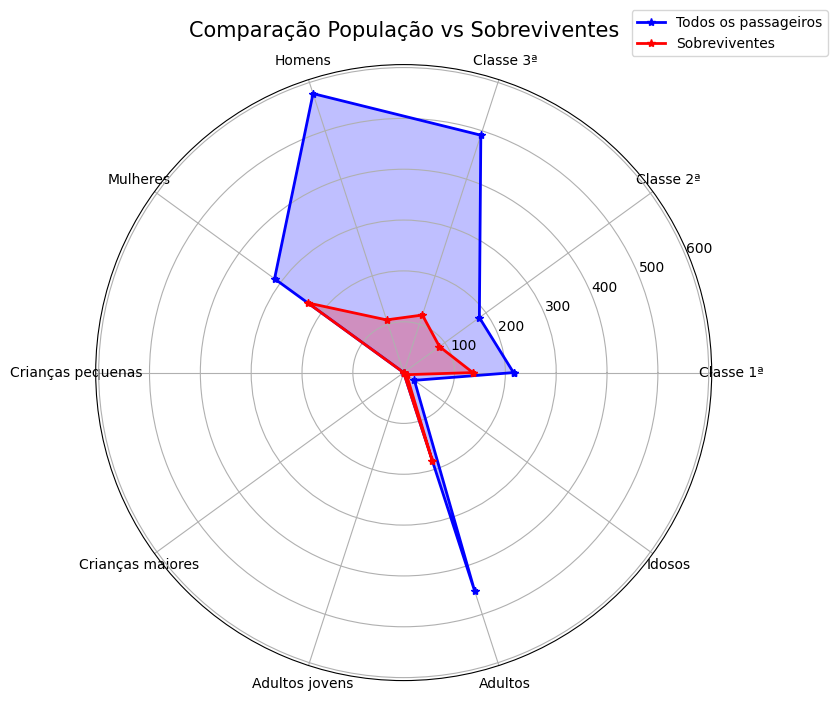

In [128]:
# Criar faixas etárias
bins = [0, 7, 17, 24, 59, 120]
labels = ["Crianças menores", "Crianças maiores", "Adultos jovens", "Adulto", "Idoso"]
df["FaixaEtaria"] = pd.cut(df["Idade"], bins=bins, labels=labels)

# Função para preparar dados para o star plot
def preparar_dados(df):
    dados = {
        "Classe 1ª": (df["Classe"] == 1).sum(),
        "Classe 2ª": (df["Classe"] == 2).sum(),
        "Classe 3ª": (df["Classe"] == 3).sum(),
        "Homens": (df["Genero"] == "Masculino").sum(),
        "Mulheres": (df["Genero"] == "Feminino").sum(),
        "Crianças pequenas": (df["FaixaEtaria"] == "Criança").sum(),
        "Crianças maiores": (df["FaixaEtaria"] == "Adolescente").sum(),
        "Adultos jovens": (df["FaixaEtaria"] == "Adulto Jovem").sum(),
        "Adultos": (df["FaixaEtaria"] == "Adulto").sum(),
        "Idosos": (df["FaixaEtaria"] == "Idoso").sum()
    }
    return dados

# Dados população geral e sobreviventes
dados_total = preparar_dados(df)
dados_sobreviventes = preparar_dados(df[df["Sobrevivente"] == "Sobrevivente"])

# Função para plotar star plot sobreposto
def star_plot_comparativo(dados1, dados2, titulo):
    categorias = list(dados1.keys())
    valores1 = list(dados1.values())
    valores2 = list(dados2.values())
    N = len(categorias)

    # Ângulos para cada eixo
    angulos = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    valores1 += valores1[:1]
    valores2 += valores2[:1]
    angulos += angulos[:1]

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # População total (azul)
    ax.plot(angulos, valores1, marker="*", linewidth=2, label="Todos os passageiros", color="blue")
    ax.fill(angulos, valores1, alpha=0.25, color="blue")

    # Sobreviventes (vermelho)
    ax.plot(angulos, valores2, marker="*", linewidth=2, label="Sobreviventes", color="red")
    ax.fill(angulos, valores2, alpha=0.25, color="red")

    # Configurações
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(categorias)
    ax.set_title(titulo, size=15, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Gráfico único comparativo
star_plot_comparativo(dados_total, dados_sobreviventes, "Comparação População vs Sobreviventes")